In [26]:
# 1-(a) Checking point 1) Use Pandas to import the CSV file
import pandas as pd

# Checking point 1) explore the data
data = pd.read_csv('volume_pressure_data.csv')

# 1-(a) Checking point 2) Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head()) # head() method returns the first 5 rows if a number is not specified

# 1-(a) Checking point 3) Calculate mean, median, and standard deviation for Volume and Pressure
volume_calculation = data['Volume'].agg(['mean', 'median', 'std'])
pressure_calculation = data['Pressure'].agg(['mean', 'median', 'std'])

First few rows of the dataset:
   Volume  Pressure
0      48   29.1250
1      46   30.5625
2      44   31.9375
3      42   33.5000
4      40   35.3125


In [27]:
# 1-(a) Checking point 3) Display the calculated statistics (volume)
print("Volume Calculation:")
print(f"Mean: {volume_calculation['mean']}")
print(f"Median: {volume_calculation['median']}")
print(f"Standard Deviation: {volume_calculation['std']}")

Volume Calculation:
Mean: 27.12
Median: 24.0
Standard Deviation: 11.192705958197358


In [28]:
# 1-(a) Checking point 3) Display the calculated statistics (pressure)
print("Pressure Calculation:")
print(f"Mean: {pressure_calculation['mean']}")
print(f"Median: {pressure_calculation['median']}")
print(f"Standard Deviation: {pressure_calculation['std']}")

Pressure Calculation:
Mean: 61.5075
Median: 58.8125
Standard Deviation: 25.84054620407626


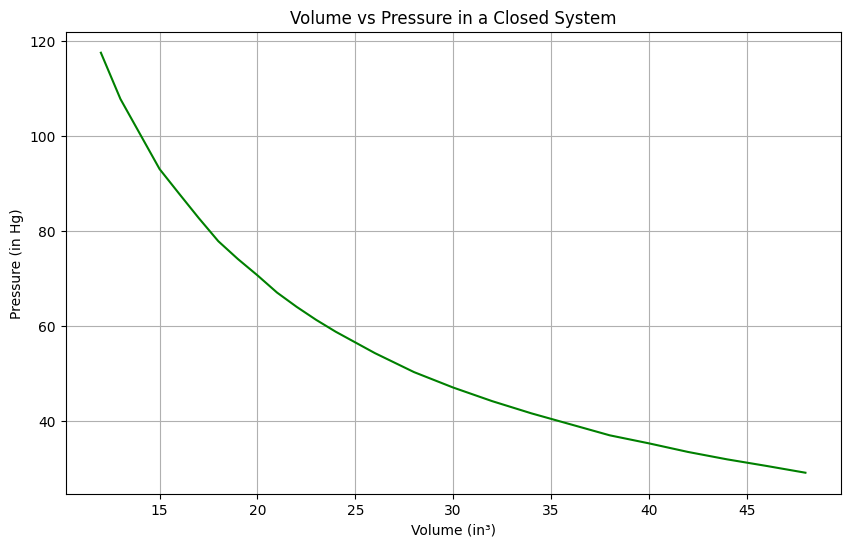

In [29]:
# 1-(b) Checking point 1) Using Matplotlib, plot the volume vs. pressure data to visualize the relationship between the two
#variables

import matplotlib.pyplot as plt

# Plotting Volume vs. Pressure
plt.figure(figsize=(10, 6))
plt.plot(data['Volume'], data['Pressure'], linestyle='-', color='g')

# 1-(b) Checking point 2)Labeling the axes
plt.xlabel('Volume (in³)')
plt.ylabel('Pressure (in Hg)')

# 1-(b) Checking point 2)Labeling the title
plt.title('Volume vs Pressure in a Closed System')

# 1-(b) Checking point 3)Include grid lines for clarify
plt.grid(True)

# Display the plot
plt.show()

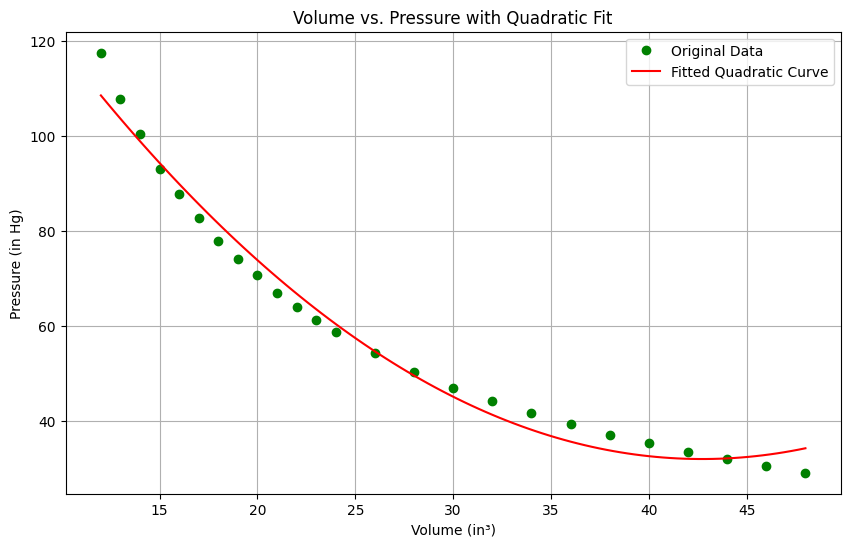

In [60]:
# 1-(c) Checking point 1)use NumPy to fit a polymonial curve to the data
import numpy as np

# 1-(c) Checking point 1)Fit a second-degree polynomial (quadratic) to the data
coefficients = np.polyfit(data['Volume'], data['Pressure'], 2)

# 1-(c) Checking point 2) Generate a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)

# 1-(c) Checking point 2)Generate values for plotting the fitted curve
volume_range = np.linspace(data['Volume'].min(), data['Volume'].max(), 100)
fitted_pressure = polynomial(volume_range)

# 1-(c) Checking point 3) Use Matplotlib to create a legend indicating which curve is the fit
plt.figure(figsize=(10, 6))
plt.plot(data['Volume'], data['Pressure'], 'go', label='Original Data')
plt.plot(volume_range, fitted_pressure, 'r-', label='Fitted Quadratic Curve')

# Labeling the axes and adding a title
plt.xlabel('Volume (in³)')
plt.ylabel('Pressure (in Hg)')
plt.title('Volume vs. Pressure with Quadratic Fit')

# Adding a legend
plt.legend()

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [61]:
# 1-(d) Checking point 1) Based on the polynomial fit, write down the curve equation
curve_equation = f"Pressure = {coefficients[0]:.4f} * Volume^2 + {coefficients[1]:.4f} * Volume + {coefficients[2]:.4f}"
print("Curve Equation:", curve_equation)

Curve Equation: Pressure = 0.0811 * Volume^2 + -6.9326 * Volume + 180.0779


In [32]:
# 1-(d) Checking point 2) Based on the polynomial fit, write down the curve equationDiscussion on the Physical Sense of the Model:

# Boyle's Law states that for an ideal gas, 
# 𝑃 × 𝑉 = constant
# P×V=constant, implying an inverse relationship between pressure and volume. The curve suggested by this model, however, is a quadratic, which does not fit the expected hyperbolic shape.

# Deviations from Ideal Gas Behavior:

# The presence of a quadratic term suggests possible deviations from ideal gas laws, potentially due to non-ideal gas effects, like intermolecular forces or high pressures where gases do not behave ideally.
# Temperature variations or other external influences could also be factors since Boyle's Law assumes constant temperature.
# The experimental setup or measurement errors might have contributed to the observed deviation.

In [63]:
# 1-(e) Checking point 1)Calculate the fitted pressures using the polynomial model for the actual volumes
fitted_pressures_actual = polynomial(data['Volume'])

# 1-(e) Checking point 1) Calculate the Root Mean Square Error (RMSE)
mse = ((data['Pressure'] - fitted_pressures_actual)**2).mean()
rmse = np.sqrt(mse)

# 1-(e) Checking point 1)Print the RMSE value
print(f"RMSE: {rmse:.4f}")

RMSE: 3.2624


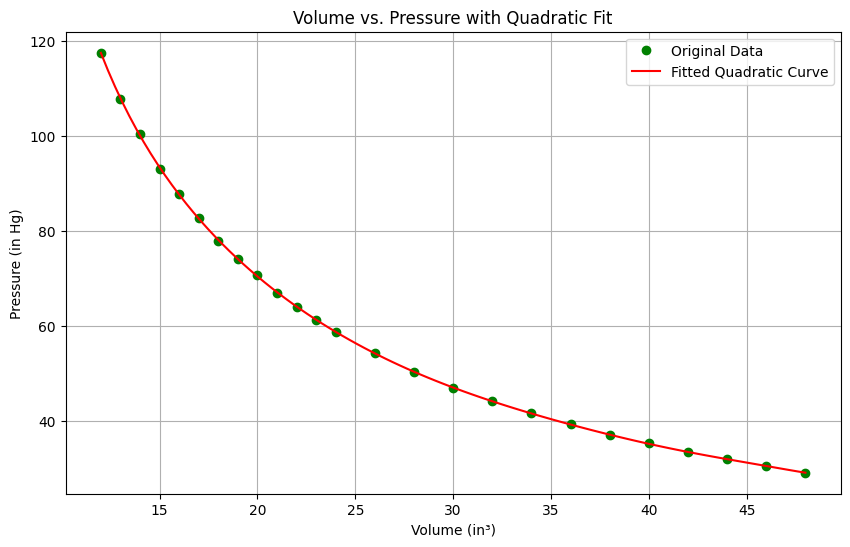

In [65]:
# I repeated the problem 1-(c) because I want to show the effect of polynomial order to the RMSE.

# 1-(c) Checking point 1)use NumPy to fit a polymonial curve to the data
import numpy as np

# 1-(c) Checking point 1)Fit a second-degree polynomial (quadratic) to the data
coefficients = np.polyfit(data['Volume'], data['Pressure'], 10)

# 1-(c) Checking point 2) Generate a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)

# 1-(c) Checking point 2)Generate values for plotting the fitted curve
volume_range = np.linspace(data['Volume'].min(), data['Volume'].max(), 100)
fitted_pressure = polynomial(volume_range)

# 1-(c) Checking point 3) Use Matplotlib to create a legend indicating which curve is the fit
plt.figure(figsize=(10, 6))
plt.plot(data['Volume'], data['Pressure'], 'go', label='Original Data')
plt.plot(volume_range, fitted_pressure, 'r-', label='Fitted Quadratic Curve')

# Labeling the axes and adding a title
plt.xlabel('Volume (in³)')
plt.ylabel('Pressure (in Hg)')
plt.title('Volume vs. Pressure with Quadratic Fit')

# Adding a legend
plt.legend()

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [66]:
fitted_pressures_actual = polynomial(data['Volume'])

# Calculate the Root Mean Square Error (RMSE)
mse = ((data['Pressure'] - fitted_pressures_actual)**2).mean()
rmse = np.sqrt(mse)

# Print the RMSE value
print(f"RMSE: {rmse:.4f}")

RMSE: 0.1429


In [ ]:
# Report the RMSE value and briefly discuss whether the polynomial fit represents the data well

# When I applied the order as 2, the RMSE was 3.2624. It is also reasonable result compared to the overall original data scale. For increasing the accuracy, we can increase the order of polynomial and reduce the RMSE value.
# For example, when I increase the order as 10, I could obtain the RMSE as 0.1429. Therefore, we can apply this process to reduce the error during fitting.